# options

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Imports

In [3]:
import pandas as pd
import os

# Exercise 1 - Read the data

the file is under the folder data and is named `supermarket_sales.csv`

In [4]:
url = 'https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/Data%20Wrangling/Data%20Wrangling%20-%20Pandas-Advanced/Data%20Analysis%20Basics/data/supermarket_sales.csv'
df = pd.read_csv(url)

# Documentation

[source of dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

**Context**
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

**Attribute information**
- **Invoice id**: Computer generated sales slip invoice identification number
- **Branch**: Branch of supercenter (3 branches are available identified by A, B and C).
- **City**: Location of supercenters
- **Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- **Gender**: Gender type of customer
- **Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- **Unit price**: Price of each product in $
- **Quantity**: Number of products purchased by customer
- **Tax**: 5\% tax fee for customer buying
- **Total**: Total price including tax
- **Date**: Date of purchase (Record available from January 2019 to March 2019)
- **Time**: Purchase time (10am to 9pm)
- **Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- **COGS**: Cost of goods sold
- **Gross margin percentage**: Gross margin percentage
- **Gross income**: Gross income
- **Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Exercise 1.1

How many cities are there in this dataset?

In [5]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [6]:
n_cities = df['City'].nunique()
n_cities

3

# Exercise 1.2

What is the average rating of items for this supermarket company?

In [7]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [8]:
df['Rating'].mean()

6.9727

# Exercise 1.3 a)

How do people prefer to pay in this supermarket? In other words, what is the distribution of the payment methods?


In [9]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

# Exercise 1.3 b)

What about the distribution of gender of their costumers?

In [10]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

# Exercise 1.4 a)

What is the invoice ID of the most expensive purchase in this dataset?

**hint**: The `Total` column represents the total cost of each purchase

In [11]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [12]:
invoice_id = df.loc[df['Total'].idxmax(), 'Invoice ID']
# or
invoice_id = df.loc[df['Total'] == df['Total'].max(), 'Invoice ID'].iloc[0]
invoice_id

'860-79-0874'

# Exercise 1.4 b)

And what was its respective amount?

In [13]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [14]:
invoice_id

'860-79-0874'

In [15]:
amount = df.loc[df['Invoice ID'] == invoice_id, 'Total'].values[0]
amount

1042.65

# Exercise 1.5 a)

What was the product line of the purchase that generated the least gross income for the supermarket?

In [16]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [17]:
df.loc[df['gross income'].idxmin(), 'Product line']

'Sports and travel'

# Exercise 1.5 b)

And what was the amount of the gross income for that purchase?

In [18]:
lowest_gross_income = df['gross income'].min()
lowest_gross_income

0.5085

# 2 - Masking

# Exercise 2.1

Who spends more on average, women or men?

*hint*: `Total` column will help you with this

In [19]:
men_average = df.loc[df['Gender'] == 'Male','Total'].mean()

women_average = df.loc[df['Gender'] == 'Female','Total'].mean()

winning_message_prefix = 'men' if men_average > women_average else 'women'

winning_message = winning_message_prefix + " won!"

print(winning_message)

women won!


# Exercise 2.2

In total, how much did customers pay in taxes in the city of Naypyitaw?

In [20]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [21]:
total_taxes_Naypyitaw = df.loc[df['City'] == 'Naypyitaw','Tax 5%'].sum()
total_taxes_Naypyitaw

5265.1765

# Exercise 2.3 a)

What product line is more common for **men** to buy from?

In [22]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [23]:
top_product_line_men = (df
                        .loc[df['Gender'] == 'Male', 'Product line']
                        .value_counts() # returns the distribution of product line for men (already sorted descending)
                        .index[0] # get the most common product line
)
top_product_line_men

'Health and beauty'

# Exercise 2.3 b)

What product line is more common for **women** to buy from?

In [24]:
top_product_line_women = (df
                        .loc[df['Gender'] == 'Female', 'Product line']
                        .value_counts() # returns the distribution of product line for men (already sorted descending)
                        .index[0] # get the most common product line
)
top_product_line_women

'Fashion accessories'

# Exercise 2.4

What is the city with the highest average rating for their purchases?

In [27]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [29]:
average_ratings_by_city = {}
for city in df['City'].unique():
    mask_city = df['City'] == city
    
    avg = df.loc[mask_city,'Rating'].mean()
    
    average_ratings_by_city[city] = avg

pd.Series(average_ratings_by_city).idxmax()

'Naypyitaw'

# 3 - Plotting

# Exercise 3.1

What is the distribution of our Product line sales? 

**hint**: you want a bar plot for this

In [30]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


<Axes: xlabel='Product line'>

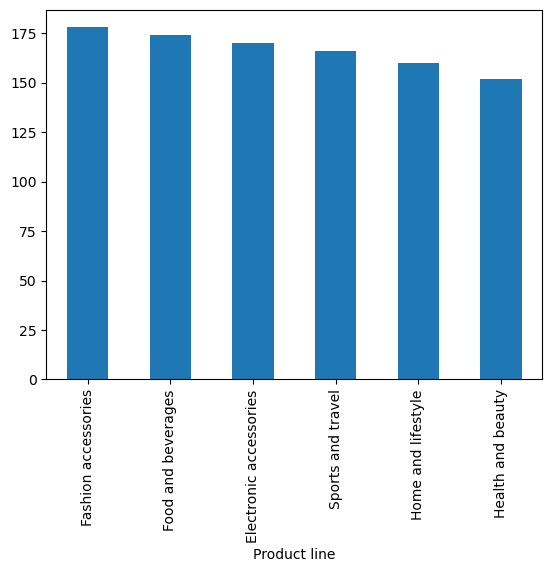

In [35]:
df['Product line'].value_counts().plot.bar()

# although don't forget to add titles and format as you need to better communicate results (chatgpt helps a lot with that, but you have to ask it for improvements in the right way)

# Exercise 3.2

What is the distribution of payments for the `Health and beauty` product line in this supermarket company? 

Use a histogram plot to analyze the distribution of payments (`Total` column)



<Axes: ylabel='Frequency'>

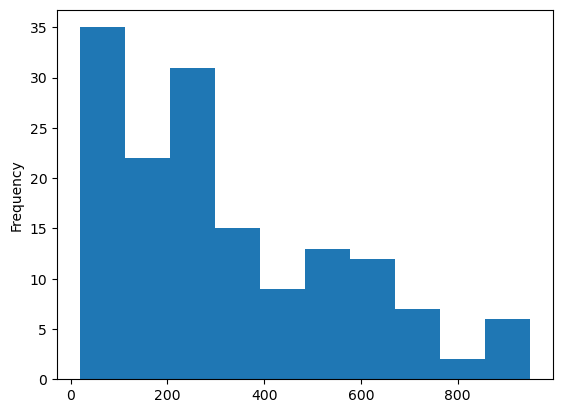

In [37]:
df.loc[df['Product line'] == 'Health and beauty','Total'].plot.hist()